Unique target values before encoding: [0 1 2 3]
Unique target values after encoding: [0 1 2 3]


C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


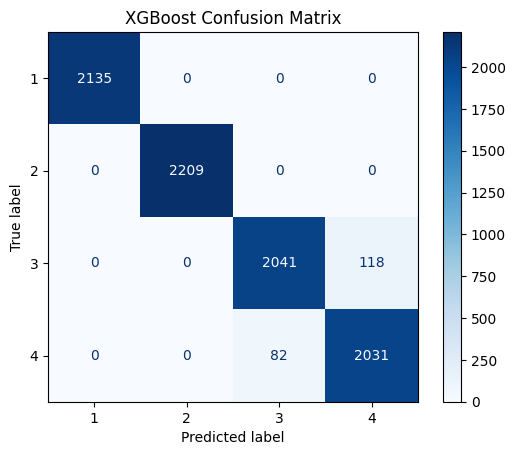

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2135
           2       1.00      1.00      1.00      2209
           3       0.96      0.95      0.95      2159
           4       0.95      0.96      0.95      2113

    accuracy                           0.98      8616
   macro avg       0.98      0.98      0.98      8616
weighted avg       0.98      0.98      0.98      8616



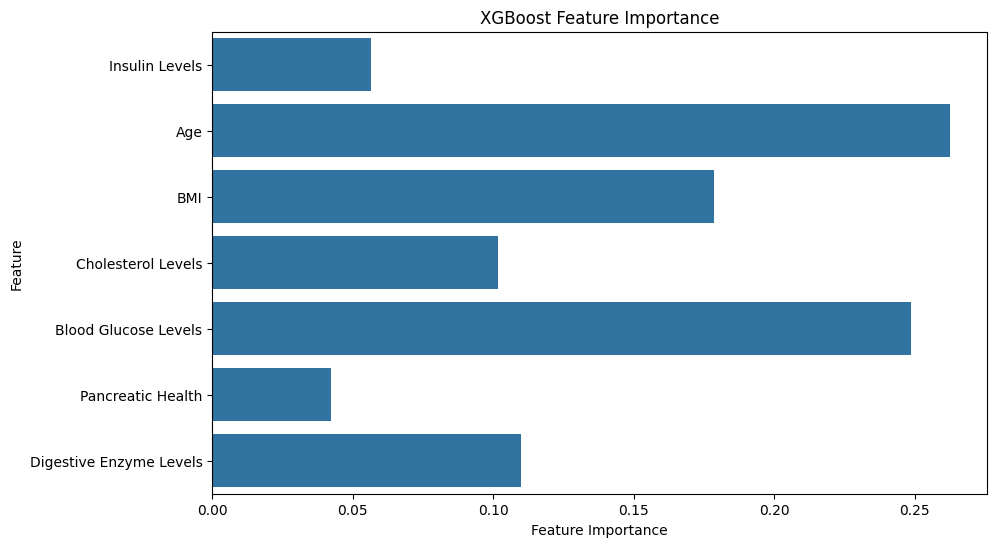

C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:53:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:53:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are no

Cross-validation scores: [0.97146163 0.97261859 0.96683378 0.96721944 0.97646605]
Mean CV Accuracy: 0.9709198971114062


<Figure size 2000x1000 with 0 Axes>

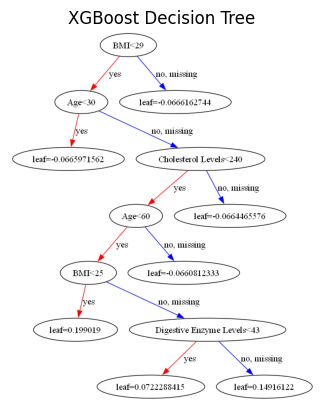

NameError: name 'booster' is not defined

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load new data
data_path = 'newdata1.csv'  # Replace with your new file path
data = pd.read_csv(data_path)

# Inspect the unique values in the target column
print("Unique target values before encoding:", data['Target'].unique())

# Inspect the target values after correction
print("Unique target values after encoding:", data['Target'].unique())

# Feature-target separation
X = data.drop(columns=['Target'])  # Drop the target column
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define hyperparameters for XGBoost
xgb_params = {
    'n_estimators': 96,           # Number of trees
    'max_depth': 6,               # Maximum depth of trees
    'min_child_weight': 100,      # Minimum sum of weights of child nodes (approx. min_samples_split)
    'subsample': 0.8,             # Fraction of samples used (similar to bootstrap=True)
    'colsample_bytree': 0.8,      # Fraction of features used per tree (similar to max_features='sqrt')
    'learning_rate': 0.1,         # Learning rate
    'scale_pos_weight': 1,        # Balance positive/negative classes (adjust for imbalance if needed)
    'eval_metric': 'mlogloss',    # Use multi-class log loss
    'random_state': 42            # Reproducibility
}

# Apply SMOTE (resample the training set to balance the classes)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize XGBoost classifier with specified parameters
xgb = XGBClassifier(**xgb_params)

# Train the model
xgb.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = xgb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1', '2', '3', '4'])
cmd.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=['1', '2', '3', '4']))

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title("XGBoost Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Cross-validation (optional for model validation)
cv_scores = cross_val_score(xgb, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# ======================= PLOTTING ================================== #

from xgboost import plot_tree

# Plot a single tree from the XGBoost model
plt.figure(figsize=(20, 10))
plot_tree(xgb, num_trees=0)  # Change num_trees to view a specific tree
plt.title("XGBoost Decision Tree")
plt.show()

# Calculate the class probabilities for the test set
y_proba = xgb.predict_proba(X_test)

# Compute the average probability for each class
avg_class_proba = np.mean(y_proba, axis=0)

# ========================== FUNNEL =========================================

# Create a DataFrame to collect all tree statistics
tree_depths = []
average_gains = []

# Iterate through each tree in the XGBoost model
for tree in booster.get_dump(with_stats=True):
    max_depth = 0
    total_gain = 0
    node_count = 0

    for line in tree.split('\n'):
        if line.strip():
            depth = line.count('\t')  # Tree depth based on tab levels
            max_depth = max(max_depth, depth)
            if "gain=" in line:
                gain = float(line.split("gain=")[1].split(",")[0])
                total_gain += gain
                node_count += 1

    # Append statistics for this tree
    tree_depths.append(max_depth)
    average_gains.append(total_gain / node_count if node_count > 0 else 0)




Fitting 8 folds for each of 1 candidates, totalling 8 fits


C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Cross-validation scores: [0.88823094 0.90599556 0.89119171 0.89267209 0.88971132 0.90007402
 0.90081421 0.89859363 0.91487787 0.89785344 0.89185185 0.90222222]
Mean CV Accuracy: 0.8978407398269231


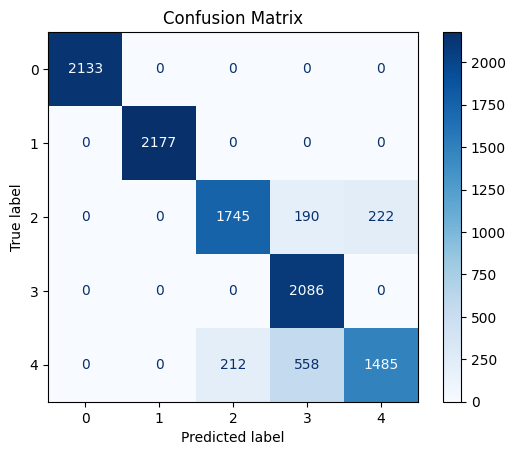

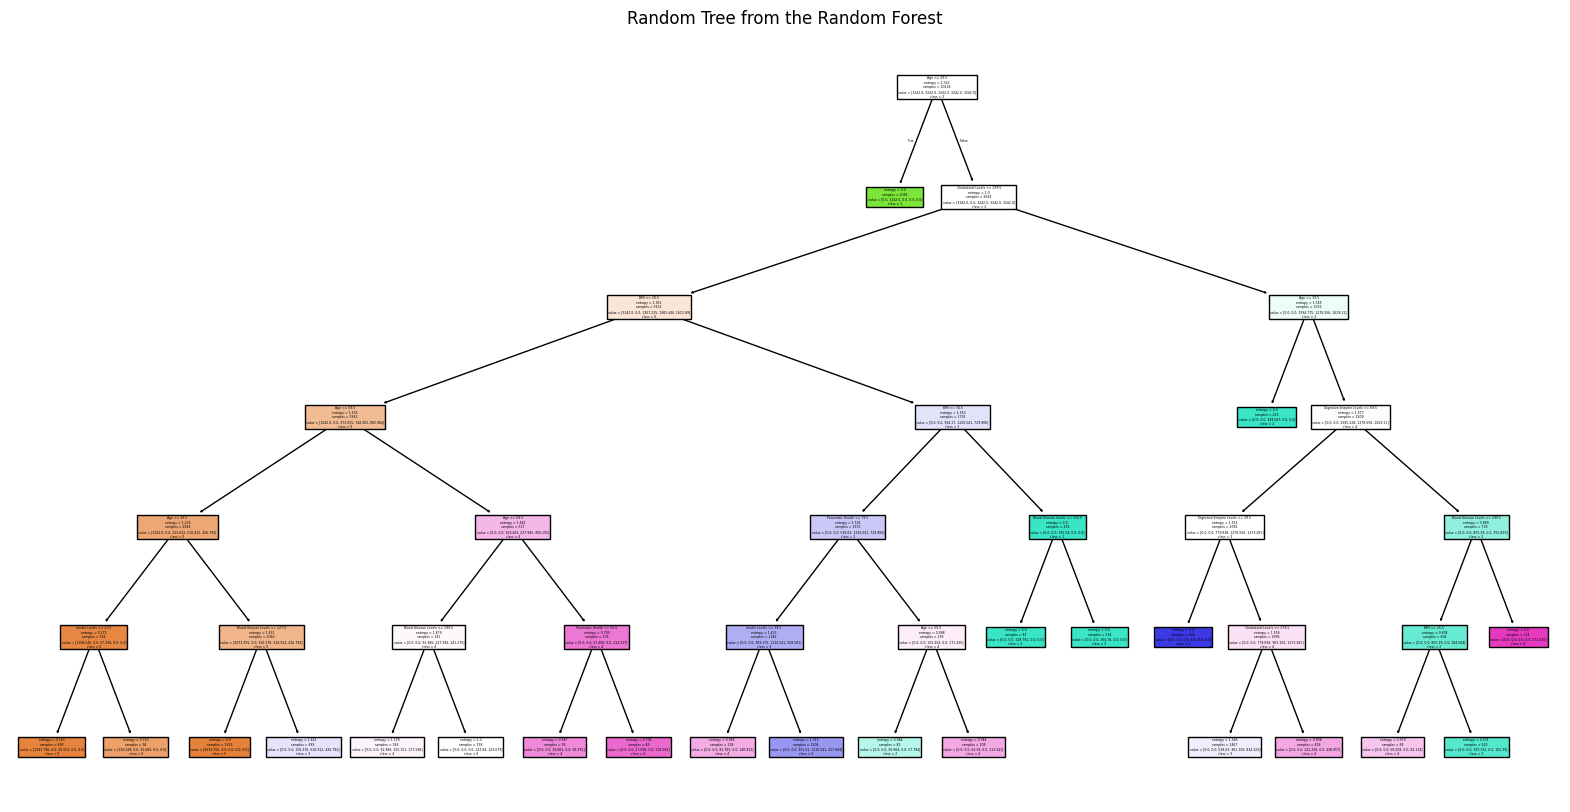

C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without featur

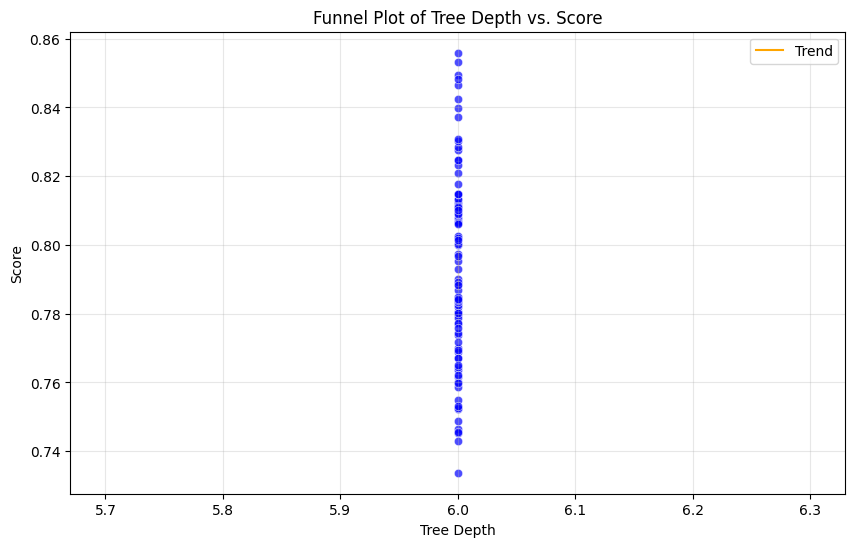

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_path = 'newdata1.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Encode categorical features
# categorical_features = ['Cystic Fibrosis Diagnosis', 'Autoantibodies']
# label_encoders = {}

# for col in categorical_features:
#     le = LabelEncoder()
#     data[col] = le.fit_transform(data[col])
#     label_encoders[col] = le  # Save encoder for potential inverse transforms
#     print(f"Encoded '{col}':", dict(zip(le.classes_, le.transform(le.classes_))))
# Feature-target separation
X = data.drop(columns=['Target'])
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define a Bayesian Random Forest (using a base RandomForestClassifier for simplicity)
rf = RandomForestClassifier(max_leaf_nodes=25, random_state=69)

# Perform GridSearchCV to find optimal parameters
param_grid = {
    'n_estimators': [96],
    'max_depth': [6],
    'min_samples_split': [100],
    'min_samples_leaf': [80],
    'bootstrap' : [True],
    'max_features' : ['sqrt'],
    'criterion' : ['entropy'],
#   'ccp_alpha': [0.2]
    'class_weight': ['balanced_subsample']
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           #funnel plot
                           scoring='recall', cv=8, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Perform cost-complexity pruning
importances = best_rf.feature_importances_
important_features = np.argsort(importances)[-len(importances)//2:]
X_train_pruned = X_train #.iloc[:, important_features]
X_test_pruned = X_test #.iloc[:, important_features]

# Cross-validation to check for overfitting
cv_scores = cross_val_score(best_rf, X_train_pruned, y_train, cv=12, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Fit pruned model
best_rf.fit(X_train_pruned, y_train)

# Predictions and confusion matrix
y_pred = best_rf.predict(X_test_pruned)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
cmd.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot a single random tree from the forest
random_tree = np.random.choice(best_rf.estimators_)
plt.figure(figsize=(20, 10))
plot_tree(random_tree, feature_names=X_train_pruned.columns, class_names=best_rf.classes_.astype(str), filled=True)
plt.title("Random Tree from the Random Forest")
plt.show()

# Funnel plots
# Parameters for type 2 and type 3 distinguish
#! Brain insulin resistance and neurotoxins

# Extract tree depths and corresponding scores
tree_depths = [estimator.tree_.max_depth for estimator in best_rf.estimators_]
tree_scores = [estimator.score(X_test_pruned, y_test) for estimator in best_rf.estimators_]

# Create a DataFrame for visualization
tree_stats = pd.DataFrame({'Tree Depth': tree_depths, 'Score': tree_scores})

# Funnel plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tree Depth', y='Score', data=tree_stats, alpha=0.7, color='blue')
sns.lineplot(x='Tree Depth', y='Score', data=tree_stats, color='orange', label='Trend')
plt.title("Funnel Plot of Tree Depth vs. Score")
plt.xlabel("Tree Depth")
plt.ylabel("Score")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# ======================== DIAGNOSTIC PROGRAM ===============================================






In [3]:
# Program to filter data to include only important components

import pandas as pd

input_file = 'master.csv' 
output_file = 'attributesFiltered.csv' 

# List of columns to keep
columns_to_keep = [
    'Target',
    'Insulin Levels',
    'Age',
    'BMI',
    # 'Waist Circumference',
    'Cholesterol Levels',
    'Blood Glucose Levels',
    'Pancreatic Health',
    # 'Neurological Assessments',
    # 'Glucose Tolerance Test',
    'Digestive Enzyme Levels'
    
]

try:
    df = pd.read_csv(input_file)

    # Filter the DataFrame to keep only the specified columns
    filtered_df = df[columns_to_keep]
    filtered_df.to_csv(output_file, index=False)
    
    print(f'Filtered data has been saved to {output_file}.')

except FileNotFoundError:
    print(f'The file {input_file} was not found. Please check the file path.')
except Exception as e:
    print(f'An error occurred: {e}')

# Program to filter tuples based on Target values

import pandas as pd

# Specify the input file name
input_file = 'attributesFiltered.csv'  # Change this to your actual input file path

# Function to filter rows based on user input
def filter_by_attribute(attribute, values):
    try:
        # Read the CSV file
        df = pd.read_csv(input_file)

        # Check if the attribute exists in the DataFrame
        if attribute in df.columns:
            # Filter the DataFrame based on the values
            filtered_df = df[df[attribute].isin(values)]
            return filtered_df
        else:
            print(f'The attribute "{attribute}" does not exist in the CSV file.')
            return None
    except FileNotFoundError:
        print(f'The file {input_file} was not found. Please check the file path.')
        return None
    except Exception as e:
        print(f'An error occurred: {e}')
        return None

# Main program
if __name__ == "__main__":
    # Read attribute name from user
    attribute_name = input("Enter the attribute name: ")

    # Read values to filter by, separated by commas
    values_input = input("Enter the values to filter by, separated by commas: ")
    values_list = [value.strip() for value in values_input.split(",")]

    # Get the filtered DataFrame
    filtered_df = filter_by_attribute(attribute_name, values_list)

    # Write the filtered DataFrame to a new CSV file if not None
    if filtered_df is not None and not filtered_df.empty:
        output_file = 'newtargetsFiltered.csv'  # Specify your desired output file name
        filtered_df.to_csv(output_file, index=False)
        print(f'Filtered data has been saved to {output_file}.')
    else:
        print("No matching records found or an error occurred.")

# Converts the string data in the 'Type' field into numerical values

import pandas as pd

def convert_and_save(input_file, output_file):
    df = pd.read_csv(input_file)
    
    # Define the mapping for the Target column
    target_mapping = {
#       'No Diabetes': 0,
        'Prediabetic': 0,
        'Type 1 Diabetes': 1,
        'Type 2 Diabetes': 2,
        'Type 3c Diabetes (Pancreatogenic Diabetes)' : 3,
        #'Secondary Diabetes': 4
        
    }
    
    # Convert the Target column using the mapping
    df['Target'] = df['Target'].map(target_mapping)
    
    # gtt_mapping = {
    #     'Normal' : 0,
    #     'Abnormal' : 1
    # }

    #  df['Glucose Tolerance Test'] = df['Glucose Tolerance Test'].map(gtt_mapping)    

    # Save the modified dataframe to a new CSV file
    df.to_csv(output_file, index=False)
    print(f"Data saved to {output_file}")

    

# Example usage
input_file_path = 'newtargetsFiltered.csv'  
output_file_path = 'newdata1.csv' 
convert_and_save(input_file_path, output_file_path)

# Target
# Prediabetic, Type 1 Diabetes, Type 2 Diabetes, Secondary Diabetes,Type 3c Diabetes (Pancreatogenic Diabetes)

Filtered data has been saved to attributesFiltered.csv.


Enter the attribute name:  Target
Enter the values to filter by, separated by commas:  Prediabetic, Type 1 Diabetes, Type 2 Diabetes, Type 3c Diabetes (Pancreatogenic Diabetes)


Filtered data has been saved to newtargetsFiltered.csv.
Data saved to newdata1.csv
